### 1.加载需要的程序包

In [1]:
library(RMySQL)
library(mice)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(sm)


载入需要的程辑包：DBI


载入程辑包：'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind



载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Package 'sm', version 2.2-5.7: type help(sm) for summary information



### 2.读取数据

In [2]:
# 创建连接
con <- dbConnect(MySQL(),
                 user="root",
                 password="",
                 host="127.0.0.1",
                 port=3306,
                 dbname="second")

In [3]:
dbSendQuery(con,'set names gbk') 

## <MySQLResult:11,5,4>

# 读取完整表
file<-dbReadTable(con,'xu1')

<MySQLResult:2,0,0>

### 3.查看数据

In [4]:
head(file)

,工作职称,发布时间,待遇,薪资,学历,经验,地区
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,大数据运维工程师,05-10发布,统计数据平台,41958,本科,0,北京·朝阳区
2,大数据分析师（实习生）,05-26发布,互联网,8000,大专,1,兰州
3,甘肃-IT-大客户销售经理/总监（政府、企业、金融）,04-17发布,计算机,22500,本科,1,兰州
4,WW-大客户销售经理（甘肃）,05-26发布,数据分析,12500,大专,5,兰州·城关区
5,大客户销售代表,05-25发布,五险一金,15000,大专,1,武汉·江岸区
6,大客户销售（兰州）,05-18发布,年终奖金,18000,大专,5,兰州


In [5]:
file['薪资'] = as.numeric(unlist(file['薪资']))

In [6]:
head(file)

,工作职称,发布时间,待遇,薪资,学历,经验,地区
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,大数据运维工程师,05-10发布,统计数据平台,41958,本科,0,北京·朝阳区
2,大数据分析师（实习生）,05-26发布,互联网,8000,大专,1,兰州
3,甘肃-IT-大客户销售经理/总监（政府、企业、金融）,04-17发布,计算机,22500,本科,1,兰州
4,WW-大客户销售经理（甘肃）,05-26发布,数据分析,12500,大专,5,兰州·城关区
5,大客户销售代表,05-25发布,五险一金,15000,大专,1,武汉·江岸区
6,大客户销售（兰州）,05-18发布,年终奖金,18000,大专,5,兰州


### 4.查看数据是否有缺失行

In [7]:
is.na(file)

工作职称,发布时间,待遇,薪资,学历,经验,地区
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [8]:
nrow(file)

[1] 133

### 5.删除有缺失行的数据

In [9]:
file1<-file[complete.cases(file),]

### 6.查看处理后的数据有多少行

In [10]:
nrow(file1)

[1] 98

### 7.查看数据信息

In [11]:
summary(file1)

   工作职称           发布时间             待遇                薪资      
 Length:98          Length:98          Length:98          Min.   : 7000  
 Class :character   Class :character   Class :character   1st Qu.:11000  
 Mode  :character   Mode  :character   Mode  :character   Median :16500  
                                                          Mean   :20342  
                                                          3rd Qu.:29000  
                                                          Max.   :50333  
     学历               经验               地区          
 Length:98          Length:98          Length:98         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

### 8.绘制薪资的频数分布直方图

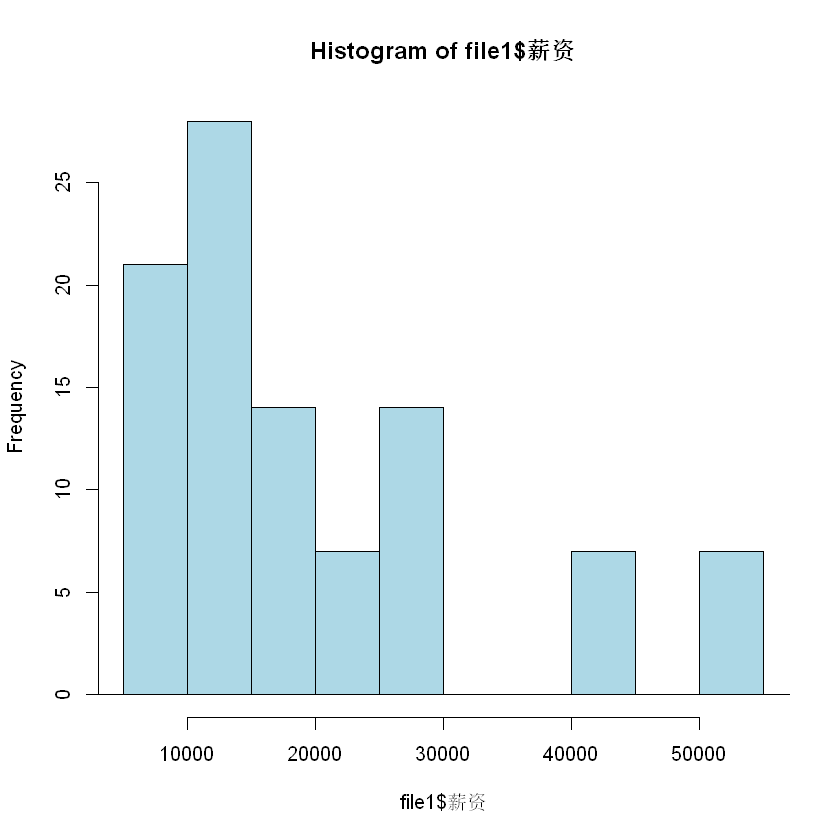

In [12]:
hist(x=file1$薪资, breaks=12,col="lightblue",border="black")
lines(density(file1$薪资))

### 9.查看薪资的数据特征

In [13]:
data1.nvars<-file1[,lapply(file1,class)=="numeric"]

In [14]:
summary(data1.nvars)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7000   11000   16500   20342   29000   50333 

In [15]:
data2<-file1

### 10.绘制大数据各个岗位中各学历占比

In [16]:
x<-data2$学历

In [17]:
frep<-table(x)

In [18]:
print(frep[1][1])

本科 
  49 


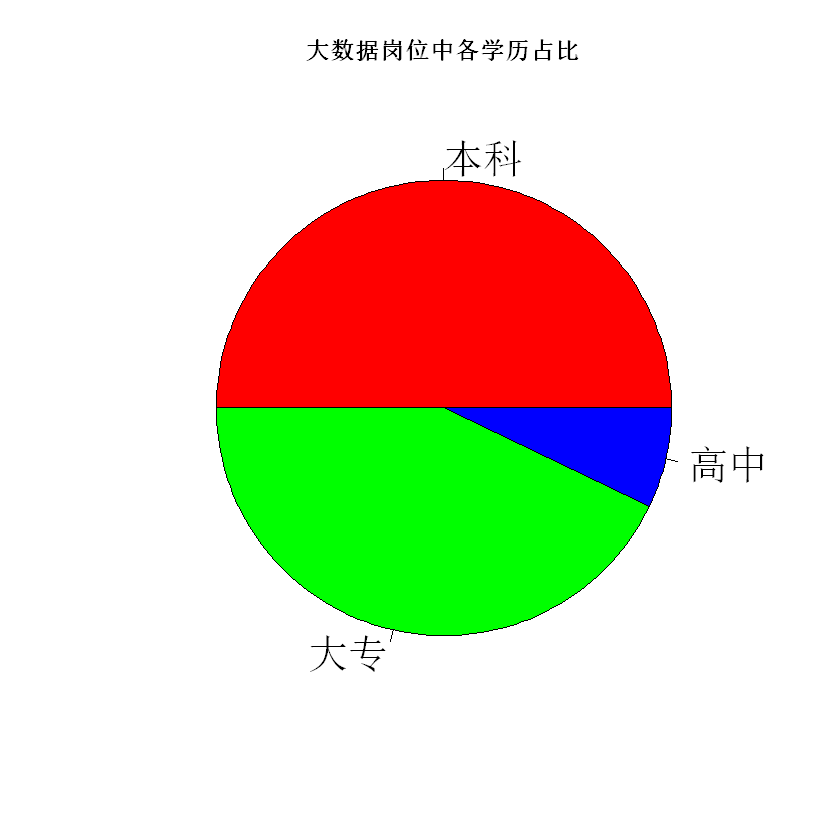

In [19]:
pie(frep,cex=2, col = rainbow(length(frep)),main="大数据岗位中各学历占比")

In [20]:
s<-as.numeric(data2$薪资)

### 11.绘制不同学历的工资的箱线图

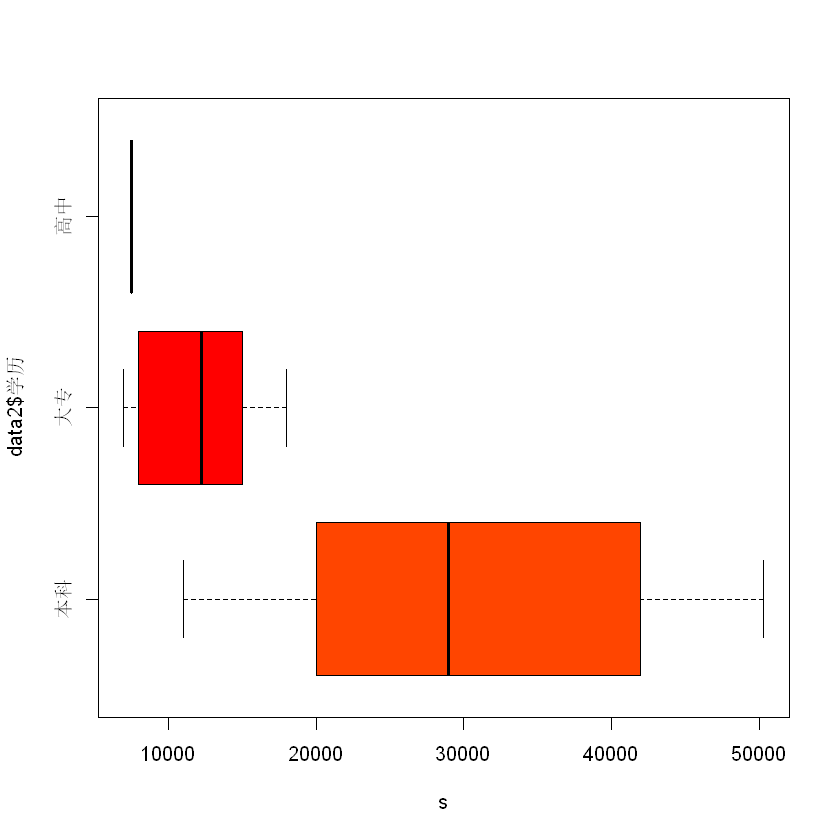

In [21]:
boxplot(s~data2$学历 , horizontal = TRUE,col = c("#FF4500", "#FF0000","#FF69B4","#FF1493"))

### 12.绘制不同学历的薪资分布图

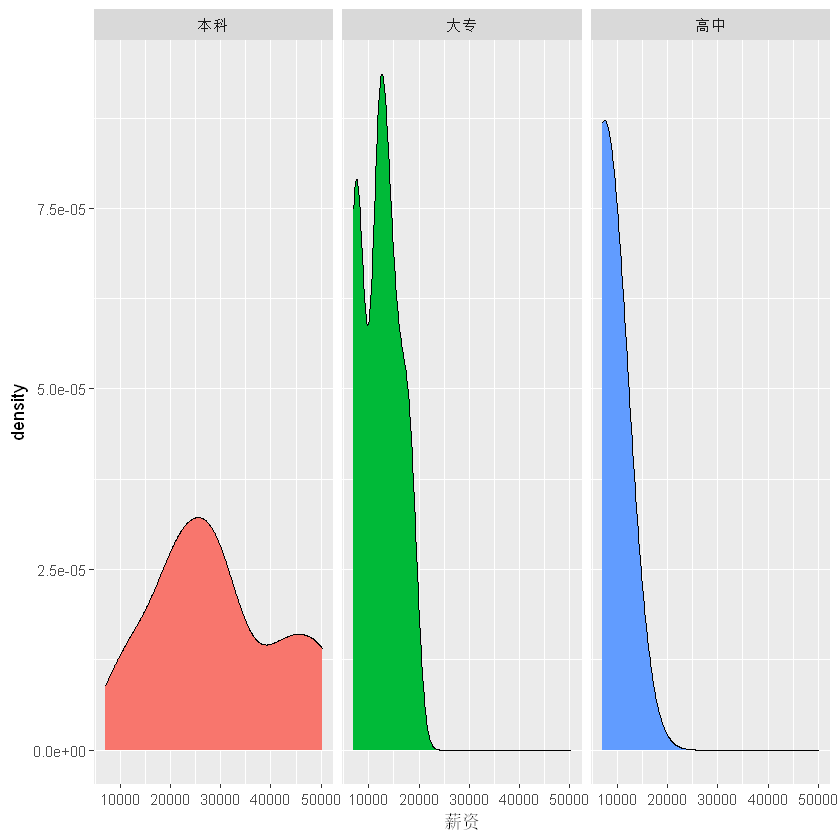

In [22]:
ggplot(data=data2,aes(x=薪资,fill=学历))+
geom_density()+
facet_wrap(~学历,ncol=4)+
theme(legend.position="none")

### 13.绘制学历与经验的核密度图

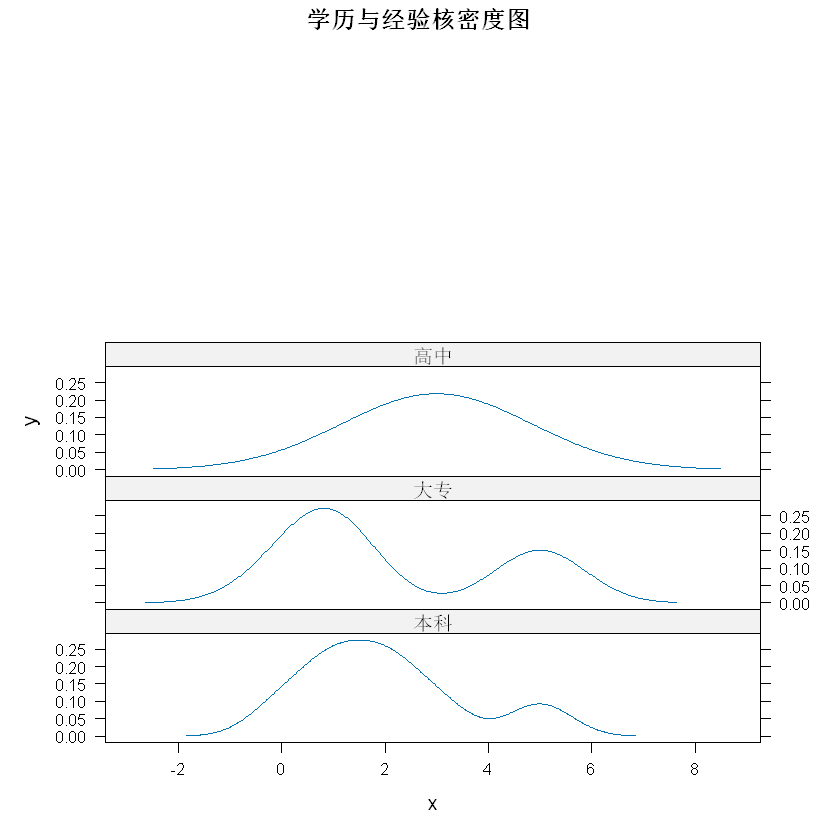

In [23]:
densityplot(~as.numeric(经验)|学历,data=data2,layout=c(1,5),plot.points=FALSE,main="学历与经验核密度图",xlab="x",ylab="y",
           )

### 14.绘制经验与薪资的散点图

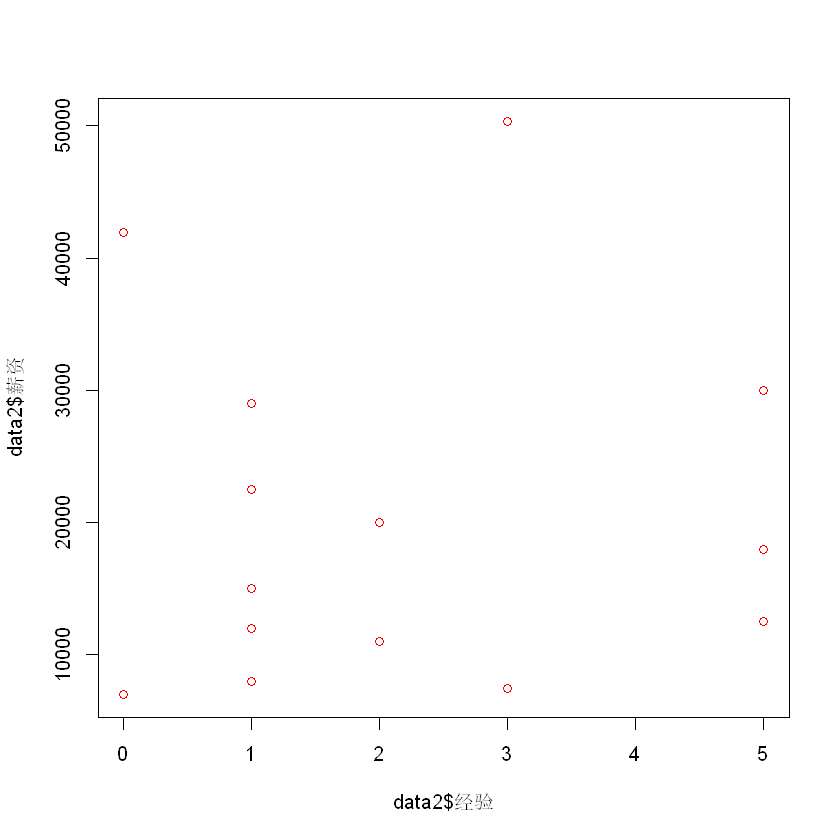

In [24]:
plot(data2$薪资~data2$经验,col='red')

In [25]:
data2

,工作职称,发布时间,待遇,薪资,学历,经验,地区
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,大数据运维工程师,05-10发布,统计数据平台,41958,本科,0,北京·朝阳区
2,大数据分析师（实习生）,05-26发布,互联网,8000,大专,1,兰州
3,甘肃-IT-大客户销售经理/总监（政府、企业、金融）,04-17发布,计算机,22500,本科,1,兰州
4,WW-大客户销售经理（甘肃）,05-26发布,数据分析,12500,大专,5,兰州·城关区
5,大客户销售代表,05-25发布,五险一金,15000,大专,1,武汉·江岸区
6,大客户销售（兰州）,05-18发布,年终奖金,18000,大专,5,兰州
12,数据开发工程师（LT11lxf）(J10451),05-23发布,java,50333,本科,3,兰州
13,数据开发工程师（兰州）,05-22发布,hadoop,11000,本科,2,兰州
14,软件数据分析师,05-26发布,存储过程,12000,大专,1,兰州


In [26]:
summary(data2)

   工作职称           发布时间             待遇                薪资      
 Length:98          Length:98          Length:98          Min.   : 7000  
 Class :character   Class :character   Class :character   1st Qu.:11000  
 Mode  :character   Mode  :character   Mode  :character   Median :16500  
                                                          Mean   :20342  
                                                          3rd Qu.:29000  
                                                          Max.   :50333  
     学历               经验               地区          
 Length:98          Length:98          Length:98         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

### 15.kmeans数据特征查看

In [27]:
ll<-data2

In [28]:
data_xinzi<-data2[,6:6]

In [29]:
print(data_xinzi)

 [1] "0" "1" "1" "5" "1" "5" "3" "2" "1" "0" "1" "5" "2" "3" "0" "1" "1" "5" "1"
[20] "5" "3" "2" "1" "0" "1" "5" "2" "3" "0" "1" "1" "5" "1" "5" "3" "2" "1" "0"
[39] "1" "5" "2" "3" "0" "1" "1" "5" "1" "5" "3" "2" "1" "0" "1" "5" "2" "3" "0"
[58] "1" "1" "5" "1" "5" "3" "2" "1" "0" "1" "5" "2" "3" "0" "1" "1" "5" "1" "5"
[77] "3" "2" "1" "0" "1" "5" "2" "3" "0" "1" "1" "5" "1" "5" "3" "2" "1" "0" "1"
[96] "5" "2" "3"


In [30]:
km = kmeans(data_xinzi, center=3)

In [31]:
km$size/sum(km$size)

[1] 0.5000000 0.2142857 0.2857143

### 16.CART决策树

In [32]:
library(tree)

In [33]:
ll[,'学历']=as.factor(ll[,"学历"])
set.seed(1234)
ind<-sample(2,nrow(ll),replace=TRUE,prob=c(0.7,0.3))
traindata<-ll[ind==1,]
testdata<-ll[ind==2,]

Warning message in tree(学历 ~ ., data = traindata):
"强制改变过程中产生了NA"


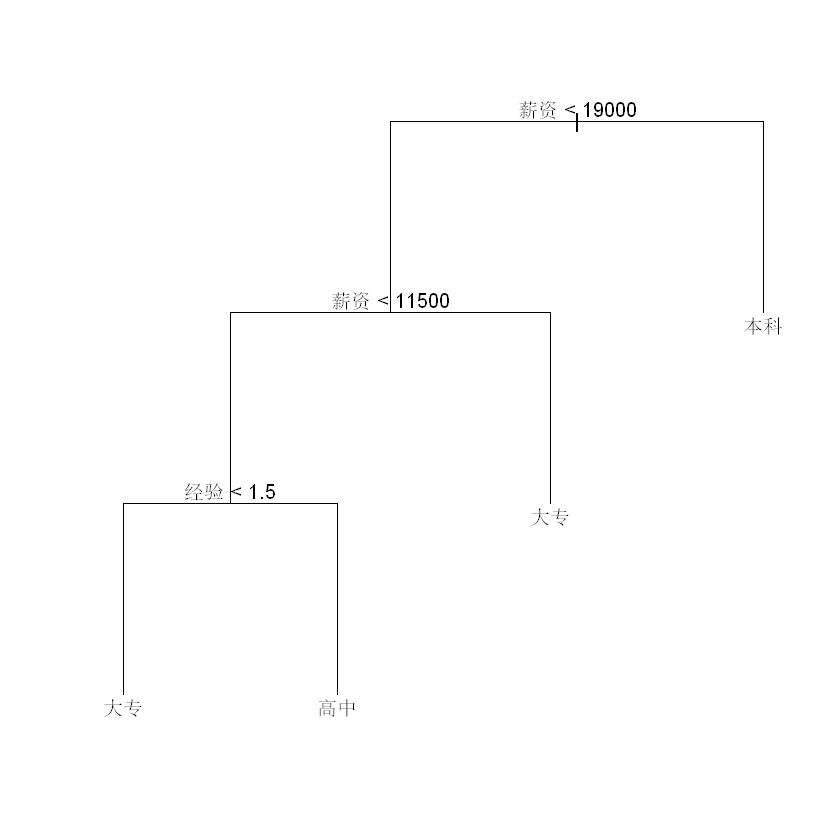

In [34]:
tree.model<-tree(学历~.,data=traindata)
plot(tree.model, type="uniform")
text(tree.model)

In [35]:
train_predict=predict(tree.model,type="class")
test_predict=predict(tree.model,newdata=testdata,type="class")

Warning message in pred1.tree(object, tree.matrix(newdata)):
"强制改变过程中产生了NA"


In [36]:
train_predictdata=cbind(traindata,predictedclass=train_predict)
train_confusion=table(actual=traindata$学历,predictedclass=train_predict)
test_predictdata=cbind(testdata,predictedclass=test_predict)
test_confusion=table(actual=testdata$学历,predictedclass=test_predict)

In [37]:
print(train_predictdata)

                                           工作职称  发布时间         待遇
1                                  大数据运维工程师 05-10发布 统计数据平台
2                            大数据分析师（实习生） 05-26发布       互联网
3   甘肃-IT-大客户销售经理/总监（政府、企业、金融） 04-17发布       计算机
4                         WW-大客户销售经理（甘肃） 05-26发布     数据分析
6                                大客户销售（兰州） 05-18发布     年终奖金
12                数据开发工程师（LT11lxf）(J10451) 05-23发布         java
13                           数据开发工程师（兰州） 05-22发布       hadoop
14                                   软件数据分析师 05-26发布     存储过程
15                                     数据统计专员 05-26发布     数据仓库
16             初级数据实施工程师（JR11dy）(J10526) 05-23发布       oracle
17                               海外财务经理G00955 05-12发布          etl
18                                             商务 05-26发布         统计
20                                 大数据运维工程师 05-10发布 统计数据平台
22  甘肃-IT-大客户销售经理/总监（政府、企业、金融） 04-17发布       计算机
23                        WW-大客户销售经理（甘肃） 05-26发布     数据分析
24                                 

In [38]:
print(train_confusion)

      predictedclass
actual 本科 大专 高中
  本科   36    0    4
  大专    0   32    0
  高中    0    0    5


In [39]:
print(test_predictdata)

                                工作职称  发布时间         待遇  薪资 学历 经验
5                         大客户销售代表 05-25发布     五险一金 15000 大专    1
19                                量体师 03-27发布         管理  7500 高中    3
21                大数据分析师（实习生） 05-26发布       互联网  8000 大专    1
36                    海外财务经理G00955 05-12发布          etl 30000 本科    5
38                                量体师 03-27发布         管理  7500 高中    3
39                      大数据运维工程师 05-10发布 统计数据平台 41958 本科    0
51                数据开发工程师（兰州） 05-22发布       hadoop 11000 本科    2
54  初级数据实施工程师（JR11dy）(J10526) 05-23发布       oracle 29000 本科    1
55                    海外财务经理G00955 05-12发布          etl 30000 本科    5
70                数据开发工程师（兰州） 05-22发布       hadoop 11000 本科    2
73  初级数据实施工程师（JR11dy）(J10526) 05-23发布       oracle 29000 本科    1
78                大数据分析师（实习生） 05-26发布       互联网  8000 大专    1
80             WW-大客户销售经理（甘肃） 05-26发布     数据分析 12500 大专    5
81                        大客户销售代表 05-25发布     五险一金 15000 大专    1
91               

In [40]:
print(test_confusion)

      predictedclass
actual 本科 大专 高中
  本科    6    0    3
  大专    0   10    0
  高中    0    0    2


### 17.词云图绘制

In [41]:
library(wordcloud2)

In [43]:
g<-data2$待遇
frep<-table(g)

In [44]:
print(frep)

g
         etl       hadoop         java       oracle     存储过程         管理 
           7            7            7            7            7            7 
      互联网       计算机     年终奖金     数据仓库     数据分析         统计 
           7            7            7            7            7            7 
统计数据平台     五险一金 
           7            7 


In [45]:
wordcloud2(frep, #数据
           size=0.4,#字体大小
           fontFamily = 'Segoe UI',#字体
           fontWeight = 'bold',#字体粗细
           color='random-light',#字体颜色设置
           backgroundColor="black"#背景颜色设置
           )

HTML widgets cannot be represented in plain text (need html)